# Ordinary Least Squares

x is the independent variable or variables on the right-hand side

y is the dependent variable on the LHS

## California median income

Example: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/v/fitting-a-line-to-data


In [4]:
import pandas as pd
import numpy as np
#import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns

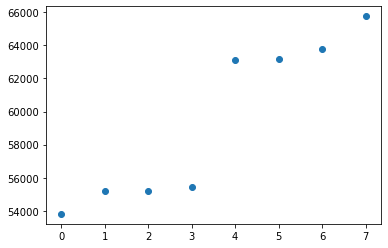

In [5]:
income = [53807, 55217, 55209, 55415, 63100, 63206, 63761, 65766]
year = list(range(len(income)))
plt.scatter(x=year, y=income)

In [6]:
from collections import namedtuple
Point = namedtuple("Point", "x y")

def vec_from_endpoints(pt1: Point, pt2: Point):
    x = [pt1.x, pt2.x]
    y = [pt1.y, pt2.y]
    return x, y


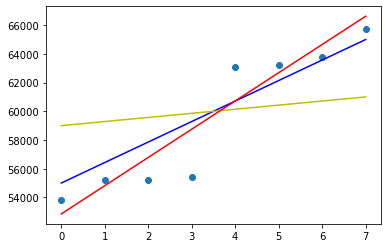

In [7]:
plt.scatter(x=year, y=income)
x, y = vec_from_endpoints(Point(0, 55000), Point(7, 65000))
plt.plot(x,y, color='b')
x, y = vec_from_endpoints(Point(0, 59000), Point(7, 61000))
plt.plot(x,y, color='y')
x, y = vec_from_endpoints(Point(0, 52847), Point(7, 66623.1)) # y=52847+1882.3 * 7
plt.plot(x,y, color='r')
plt.show()

# Two ways to figure out the equation for the red line 

Use whichever suits your understanding the best, NumPy or Scikit-learn.

## NumPy

Reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [8]:
x_years = np.array(year)
y_inc = np.array(income)
y_inc

array([53807, 55217, 55209, 55415, 63100, 63206, 63761, 65766])

### Rewriting the equation as

$y = Ap$

where 
$A = [[x 1]]$

and 

$p = [[m] [b]]$


In [13]:
A = np.vstack([x_years, np.ones(len(x_years))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.]])

In [46]:
m, b = np.linalg.lstsq(A, y_inc, rcond=None)[0]
print(f'OLS is y = {m:.2f} x + {b:.2f}')

OLS is y = 1882.25 x + 52847.25


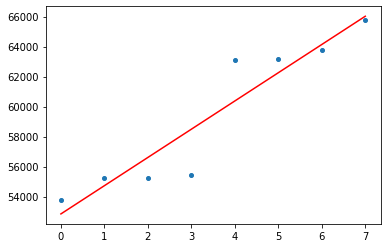

In [17]:
plt.plot(x_years, y_inc, 'o', label='CA income', markersize=4)
plt.plot(x_years, m*x_years + b, 'r', label='Fitted line')
plt.show()

## Now with scikit-learn

Example: https://realpython.com/linear-regression-in-python/

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn.linear_model import LinearRegression
yy_inc = y_inc
xx_years = x_years.reshape((-1, 1))
xx_years

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [21]:
model = LinearRegression()
model.fit(xx_years, yy_inc)

LinearRegression()

In [45]:
mm = model.coef_
bb = model.intercept_
mm[0]
bb
print(f'OLS is y = {mm[0]:.2f} x + {bb:.2f}')

OLS is y = 1882.25 x + 52847.25


## Financial example
## Recall our TSLA vs SPX 
- Module 8: We read in the returns by looking at monthly closes
- Module 9: We speeded this up by using an API

In [28]:
tickers = ['TSLA', 'WFC', '^GSPC']

start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)
 
df = pdr.get_data_yahoo(tickers, start, end, interval="d")
price_df = df['Adj Close']
# Note that we're using Pandas pct_change
ret_df = price_df.pct_change()
ret_df.dropna(inplace=True)
ret_df = ret_df[ret_df['^GSPC'] != 0.0]
ret_df.head(22)

Symbols,TSLA,WFC,^GSPC
Date,,,
2021-01-05,0.007317,0.027946,0.007083
2021-01-06,0.028390,0.070750,0.005710
2021-01-07,0.079447,0.022637,0.014847
2021-01-08,0.078403,-0.007179,0.005492
2021-01-11,-0.078214,0.001506,-0.006555
2021-01-12,0.047153,0.021059,0.000416
2021-01-13,0.005851,-0.004125,0.002276
2021-01-14,-0.011013,0.028106,-0.003753
2021-01-15,-0.022296,-0.077985,-0.007190


## Let's do some scatter plots.

- SPX vs SPX had better be a line!
- SPX vs WFC (and a word about why SPX is on the horizontal x-axis)
- SPX vs TSLA

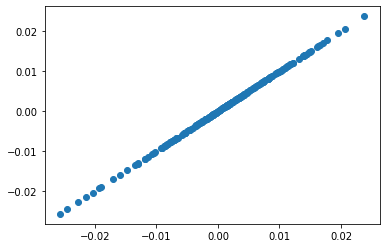

In [29]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['^GSPC']) # BTW what would this look like as a histogram

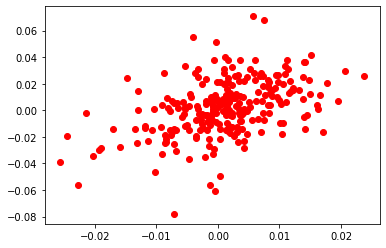

In [30]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['WFC'], c='r')

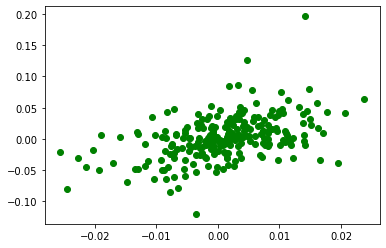

In [31]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['TSLA'], c='g')

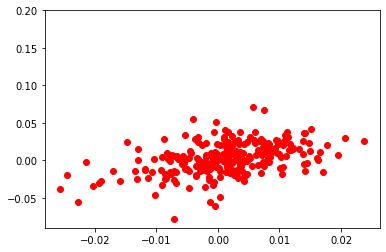

In [32]:
# TSLA is a lot more volatile, so let's look at WFC on the same scale
# plt.xlim(-0.025, +0.025) Commenting out, but we could give min and max of x as well
plt.ylim(-0.09, +0.20)
plt.scatter(x=ret_df['^GSPC'], y=ret_df['WFC'], c='r')

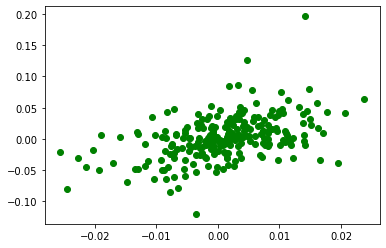

In [33]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['TSLA'], c='g')

# Some guesses as to the relation between the index and the stock


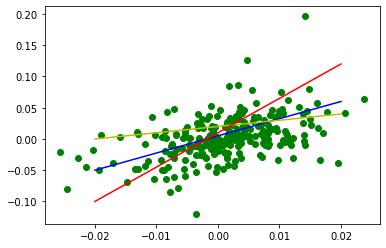

In [34]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['TSLA'], c='g')
x, y = vec_from_endpoints(Point(-0.02, -0.05), Point(0.02, 0.06))
plt.plot(x,y, color='b')
x, y = vec_from_endpoints(Point(-0.02, -0.00), Point(0.02, 0.04))
plt.plot(x,y, color='y')
x, y = vec_from_endpoints(Point(-0.02, -0.10), Point(0.02, 0.12))
plt.plot(x,y, color='r')
plt.show()

# OLS to the rescue
## Here are a few reasons to like Seaborn
- Handles dataframes
- Titles the axes
- regplot is for regression plots
- With fit_reg = True, draws a regression line

Reference (and scroll down to regplot): https://seaborn.pydata.org/api.html

<AxesSubplot:xlabel='^GSPC', ylabel='TSLA'>

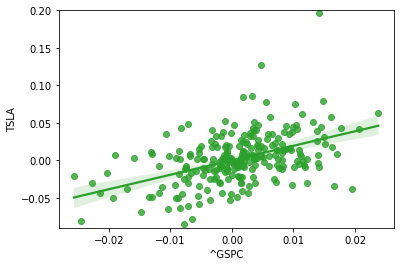

In [35]:
plt.ylim(-0.09, +0.20)
sns.regplot(data=ret_df, x='^GSPC', y='TSLA', color='tab:green', fit_reg=True)

<AxesSubplot:xlabel='^GSPC', ylabel='WFC'>

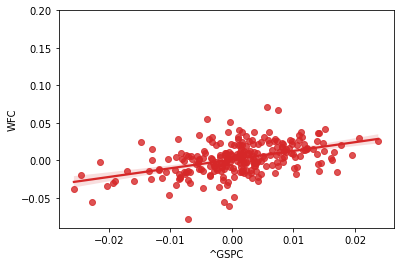

In [36]:
plt.ylim(-0.09, +0.20)
sns.regplot(data=ret_df, x='^GSPC', y='WFC', color='tab:red', fit_reg=True)

In [48]:
ticker = 'TSLA'
regr = LinearRegression()
X = ret_df['^GSPC'].values.reshape(-1,1)
y = ret_df[ticker].values.reshape(-1,1)
regr.fit(X, y)
bbb = regr.intercept_[0]
mmm = regr.coef_[0][0]
print(f'OLS for {ticker} is y = {mmm:.2f} x + {bbb:.2f}')

OLS for TSLA is y = 1.93 x + 0.00


# Pythonic

## Writing DataFrames
Format similar to read_excel, read_csv
- to_excel
- to_csv



In [49]:
Person = namedtuple('Person', 'first last age')
lvb = Person('Ludwig', 'van Beethoven', 56)
fjh = Person('Franz', 'Haydn', 77)
wam = Person('Wolfgang', 'Mozart', 35)
composers = [lvb, fjh, wam]
df = pd.DataFrame(composers)
df

,first,last,age
0,Ludwig,van Beethoven,56
1,Franz,Haydn,77
2,Wolfgang,Mozart,35


In [51]:
df.to_excel('composers.xlsx')
df.to_csv('composers.csv')

## Writing text files

old school: https://www.guru99.com/reading-and-writing-files-in-python.html

I prefer the with block: https://realpython.com/read-write-files-python/

In [54]:
# Solid old school (you'll still see this)

f= open("guru99.txt","w")
for i, c in enumerate(composers):
     f.write(f'Composer {i+1}: {c.first} {c.last} died at age {c.age}.\n')
f.close()

In [56]:
with open('composers.txt', 'w') as f:
    for i, c in enumerate(composers):
        f.write(f'{c.last}, {c.first} is composer {i+1}')
# no f.close needed